In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from timeit import default_timer as timer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import collections
import helpers
from helpers import *

In [2]:
%pwd

'/Users/thomasspringett/github/heartrate'

In [3]:
csv_file = 'data/HeartRateData.csv'
df_raw = pd.read_csv(csv_file)
df_raw=df_raw.drop('DateTime',1)
df_raw.head()

,BPM
0,77
1,69
2,69
3,69
4,69


In [4]:
print (round(df_raw.BPM.describe()))
 

count    349768.0
mean         78.0
std          24.0
min          30.0
25%          61.0
50%          69.0
75%          86.0
max         215.0
Name: BPM, dtype: float64


In [5]:
def zones(df_raw, age):
    max_hr = 220 - age
    target_low = 0.64*max_hr
    target_high = 0.76*max_hr
    target_intensity_lo = 0.76*max_hr
    target_intensity_hi = 0.93*max_hr
    print ("For Age: {} Maximum HR: {}".format(age,max_hr))
    print ("Target HR Lower Bound:", target_low)
    print ("Target HR Upper Bound:", target_high)
    print ("Target HR Intensity Upper Bound:", target_intensity_hi)
    return max_hr, target_low, target_high, target_intensity_lo, target_intensity_hi

In [6]:
max_hr, target_low, target_high, target_intensity_lo, target_intensity_hi = zones(df_raw,62)

For Age: 62 Maximum HR: 158
Target HR Lower Bound: 101.12
Target HR Upper Bound: 120.08
Target HR Intensity Upper Bound: 146.94


In [7]:
def plot_data_histo(totals): 
    #Histogram of the number of missing values per column (featrure).
    xref = [max_hr,target_low, target_high,target_intensity_hi]
    ref_colors=['r','g','y','b']

    for ref, c in zip(xref,ref_colors):
        plt.axvline(x=ref, c=c, label= 'ref at = {}'.format(ref))
    plt.legend()
    plt.grid(True)
    plt.xlabel('Beats/Minute')
    plt.ylabel('Count')
    plt.title('Heart Rate Distribution')
    plt.hist(df_raw.BPM,50)
    plt.show()

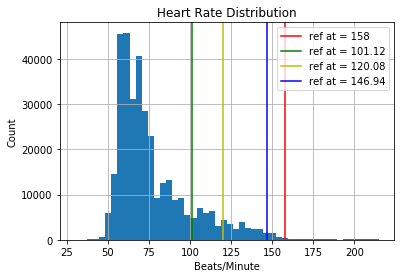

In [8]:
#print (df.BPM)
plot_data_histo(df_raw.BPM)

In [9]:
#df_raw.BPM.quantile([0.95,0.98,0.99])

In [10]:
hardware_limit = 210
df = df_raw[(df_raw.BPM < hardware_limit)]
num_screened = df_raw.shape[0]-df.shape[0]
print ("Applying hardware limit of {}bpm resulted in dropping {} data points.".format(hardware_limit,num_screened))

Applying hardware limit of 210bpm resulted in dropping 314 data points.


In [11]:

def scree_KMeans_plot(data,num_clusters):
    clusterCenters = [] 
    scores = [] 
    k_values = []
    start = timer()
    for k in range(1,num_clusters):
        k_values.append(k)
        kmeans = KMeans(n_clusters=k)
        model = kmeans.fit(data)
        print ("\nCluster {}: {}".format(k,model.cluster_centers_))
        clusterCenters.append(model.cluster_centers_)
        labels = kmeans.predict(data)
        print ("Cluster Label: ",labels)
        score = -(kmeans.score(data))
        print ("score: ",round(score/100000000,2))
        scores.append(score)
    plt.plot(k_values, scores, marker = 'o')
    plt.ylabel('K-Cluster Score')
    plt.xlabel('k value')
    plt.title('Number of Clusters vs KMeans Score')
    plt.savefig('Cluster_vs_score_plot.png')
    plt.show()
    end = timer() 
    print(f"\nFunction in {(end - start)/60:0.1f} minutes")
    return k_values, scores, labels


Cluster 1: [[77.52634109]]
Cluster Label:  [0 0 0 ... 0 0 0]
score:  1.89

Cluster 2: [[ 67.39849131]
 [115.66932624]]
Cluster Label:  [0 0 0 ... 0 0 0]
score:  0.54

Cluster 3: [[ 87.68667061]
 [127.76962689]
 [ 63.25309656]]
Cluster Label:  [0 2 2 ... 2 2 2]
score:  0.28

Cluster 4: [[104.35769113]
 [ 78.97879596]
 [ 61.66033189]
 [138.25791948]]
Cluster Label:  [1 2 2 ... 2 2 2]
score:  0.17

Cluster 5: [[ 59.53639126]
 [111.37086986]
 [ 71.85607837]
 [142.22547081]
 [ 88.60821494]]
Cluster Label:  [2 2 2 ... 0 0 0]
score:  0.12

Cluster 6: [[ 71.85607837]
 [134.60010654]
 [ 59.53639126]
 [108.8175716 ]
 [180.75193399]
 [ 88.25771775]]
Cluster Label:  [0 0 0 ... 2 2 2]
score:  0.09

Cluster 7: [[ 68.44468475]
 [137.60192538]
 [ 95.9458388 ]
 [ 58.39574023]
 [183.74633861]
 [ 80.78030018]
 [114.03523166]]
Cluster Label:  [5 0 0 ... 3 3 3]
score:  0.06

Cluster 8: [[ 66.6416811 ]
 [107.14831804]
 [ 57.91997182]
 [144.84094667]
 [ 90.36041616]
 [187.34594223]
 [ 76.86944039]
 [125.718

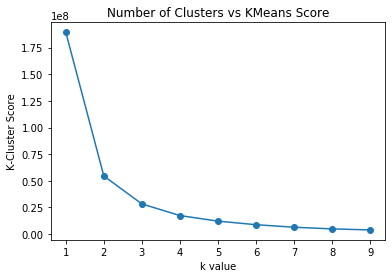


Function in 0.4 minutes


In [12]:
k_values, scores, labels = scree_KMeans_plot(df,10) 
k = zip(k_values, scores)
print (k)

In [20]:
labels.shape
if not 'Label' in df: 
    df.insert(1,"Label",labels)
df.tail(5)


,BPM,Label
349762,62,2
349763,67,5
349764,61,2
349765,63,5
349766,62,2


In [40]:
def clusters_plot(df):
    print (df.head())
    if  'Label' in df: 
        df.drop("Label",axis='columns',inplace=True)
    print (df.head())
    kmeans = KMeans(n_clusters=2)
    model = kmeans.fit(df)
    print ("\nCluster {}: {}".format(k,model.cluster_centers_))
    labels = kmeans.predict(df)
    print ("Cluster Label: ",labels)
   
    df.insert(1,"Label",labels)
    print (df.head())
    cluster = df.loc[df['Label'] == 8]
    print (x)
        
clusters_plot(df)

   BPM
0   77
1   69
2   69
3   69
4   69
   BPM
0   77
1   69
2   69
3   69
4   69

Cluster <zip object at 0x7fc339c97648>: [[ 67.39849131]
 [115.66932624]]
Cluster Label:  [0 0 0 ... 0 0 0]
   BPM  Label
0   77      0
1   69      0
2   69      0
3   69      0
4   69      0


NameError: name 'x' is not defined

In [14]:
print ("KMeans Labels: ",np.unique(labels))     

KMeans Labels:  [0 1 2 3 4 5 6 7 8]


In [15]:
for score in scores:
    print (round(score/100000000,2))
def findK(df,limit): 
    for k in range(len(df)):
        if k > 0:
          improvement = (round(100*((df[k-1]-df[k])/df[k])))
          print (k,round(df[k]/100000000,2),improvement)
          if improvement < limit:
                break 
    print ("Less than {}% improvement in score after k = {}".format(limit,k))
findK(scores,10)      

1.89
0.54
0.28
0.17
0.12
0.09
0.06
0.05
0.04
1 0.54 248.0
2 0.28 92.0
3 0.17 63.0
4 0.12 43.0
5 0.09 38.0
6 0.06 37.0
7 0.05 33.0
8 0.04 25.0
Less than 10% improvement in score after k = 8


In [16]:
%%time
def silhouetteScore(df): 
    sil_scores = [] 
    start = timer()
    range_n_clusters = list(range(2,10))
    for n_clusters in range_n_clusters:
        kmeans = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = kmeans.fit_predict(df)
        score = silhouette_score(df,cluster_labels)
        sil_scores.append(score)
        print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))
        end=timer()
        print(f"\nFunction in {(end - start)/60:0.1f} minutes")
    return sil_scores

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 12.2 µs


In [17]:
#sil_scores = silhouetteScore(df)

In [18]:
pickle.dump(sil_scores,open('data/silhouetteScores','wb'))
silhouette = pickle.load(open('data/silhouetteScores', 'rb'))
print ("Sil Scores: ",silhouette)

NameError: name 'pickle' is not defined

In [ ]:
def silhouette_plot(scores, k_values):
    start = timer()
    plt.plot(k_values, scores, marker = 'o')
    plt.ylabel('Silhouette Score')
    plt.xlabel('k value')
    plt.title('Silhouete For Best K')
    plt.show()
    end = timer() 
    print(f"\nFunction in {(end - start)/60:0.1f} minutes")

In [ ]:
silhouette_plot(sil_scores,k_values)

In [ ]:
# Maximum Heart Rate: 200 - 1/2 age. Harvard Health News 
#Target Heart Rate Zone: 60%-75%. 70 yr old max would be 165 and target of 99 to 124. Harvard Health News.
# Maxiumum Heart Rate is 200 - Age. CDC. 
# Target Heart Rate is 64% to 76%. CDC. 
# Intenisty target heart rate is 77% to 93%. CDC. 
# Polar.com: 
# 5 Zones. 1: very light at 60-70% of HRMAX. Boost recovery, 
#2: light at 60-70% improve general endurance and increase capillary density. , 
#3:moderate at 70-80%.Lactic acid build up, improve efficiency of blood circulation in the heart and muscles
#4: Hard 80-90%, 5: Maximum 90-100%. 
#5 - improve speed endurance. 

In [ ]:
#Count number in each cluster for general population 
clusterDict = collections.Counter(labels)
#print (clusterDict)

clusterSum = sum(clusterDict.values())

for key,value in sorted(clusterDict.items()): 
    print (key, ' ->',np.round(100*value/clusterSum,2),'%')

In [ ]:
def make_histos(df_col1,df_col2,df_col3,df_col4,df_col5,df_col6):
   
    bins = 20
    bins = np.linspace(0, 10, 50)
    
    column1, df1, df2 = df_col1
    column2, df3, df4 = df_col2
    column3, df5, df6 = df_col3
    column4, df7, df8 = df_col4
    column5, df9, df10 = df_col5
    column6, df11, df12 = df_col6

    fig, ax = plt.subplots(2,3, sharex=True,sharey=True,figsize=(14,4),gridspec_kw={'hspace': 0.3})
    
    ax0, ax1,ax2,ax3,ax4,ax5 = ax.flatten()
     
    ax0.hist(df1,bins,label='Lower',histtype='bar',stacked = False)
    ax0.hist(df2,bins,label='Higher',histtype='bar', stacked = False)
    ax0.set_title('Category: ' + column1)
    ax0.legend(loc='upper right')
    ax0.grid(True)
    
    ax1.hist(df3,bins,label='Lower',stacked = False)
    ax1.hist(df4,bins,label='Higher',stacked = False)
    ax1.set_title('Category: ' + column2)
    ax1.legend(loc='upper right')
    ax1.grid(True)
    
    ax2.hist(df5,bins,label='Lower',stacked = False)
    ax2.hist(df6,bins,label='Higher',stacked = False)
    ax2.set_title('Category: ' + column3)
    ax2.legend(loc='upper right')
    ax2.grid(True)
        
    ax3.hist(df7,bins,label='Lower',stacked = False)
    ax3.hist(df8,bins,label='Higher',stacked = False)
    ax3.set_title('Category: ' + column4)
    ax3.legend(loc='upper right')
    ax3.grid(True)
    
    ax4.hist(df9,bins,label='Lower',stacked = False)
    ax4.hist(df10,bins,label='Higher',stacked = False)
    ax4.set_title('Category: ' + column5)
    ax4.legend(loc='upper right')
    ax4.grid(True)
    
    ax5.hist(df11,bins,label='Lower',stacked = False)
    ax5.hist(df12,bins,label='Higher',stacked = False)
    ax5.set_title('Category: ' + column6)
    ax5.legend(loc='upper right')
    ax5.grid(True)
    
    plt.subplots_adjust(wspace= 0.1)
    plt.legend(loc='upper right')
 
    fig.text(0.5,0.04,'Category Code', ha='center')
    fig.text(0.04,0.5,'Number of Rows', va='center', rotation='vertical')
    plt.show()
    return

